# Введение
Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. \
Необходимо выявить определяющие успешность игры закономерности. Что позволит сделать выбор в сторону на потенциально популярному продукту и спланировать рекламные кампании.
Для этого необходимо:
- Открыть файл с данными и изучите общую информацию
- Подготовить данные
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона
- Проверить гипотезы
- Написать общий вывод

In [1]:
import numpy as np
from math import factorial
from scipy import stats as st
import pandas as pd
import itertools
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В датасете 11 столбцов и 16715 значений. В столбцах Name: Year_of_Release,Genre,Critic_Score,User_Score,Rating - визуально имеются пропуски. Имена столбцов написаны с большой буквы.

Просмотрим столбцы в датасете

Name — название игры \
Platform — платформа \
Year_of_Release — год выпуска \
Genre — жанр игры \
NA_sales — продажи в Северной Америке (миллионы проданных копий) \
EU_sales — продажи в Европе (миллионы проданных копий) \
JP_sales — продажи в Японии (миллионы проданных копий) \
Other_sales — продажи в других странах (миллионы проданных копий) \
Critic_Score — оценка критиков (максимум 100) \
User_Score — оценка пользователей (максимум 10) \
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
games_data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [5]:
games_data['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [6]:
games_data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбце платформы представлены разнообразные платформы.\
Но при этом присутвуют странные названия стоит проверить '2600','GC','GEN','DC','PSV','SAT','SCD','WS','NG','TG16','GG','PCFX'

In [7]:
games_data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Всего 12 жанров. За последние 20 лет существует тенденция к смешиванию жанров. \
Странно то что все жанры 'чистые' почему - то отсутвует поджанры Open world и игра сервис а так же инди.

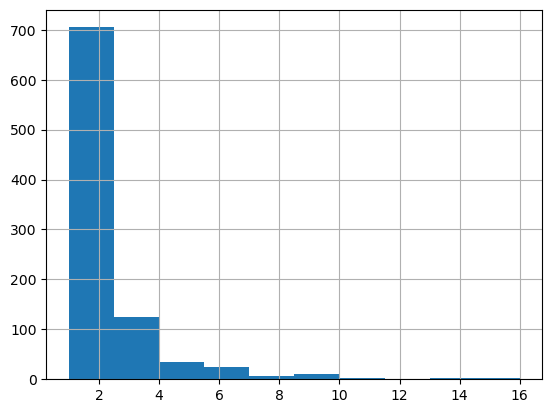

In [8]:
games_data['NA_sales'].hist(range =(1,16)); 

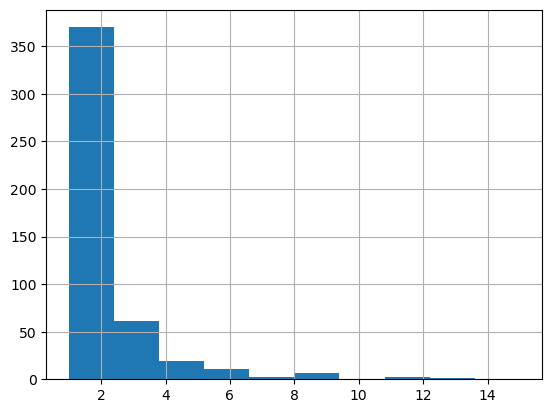

In [9]:
games_data['EU_sales'].hist(range =(1,15));

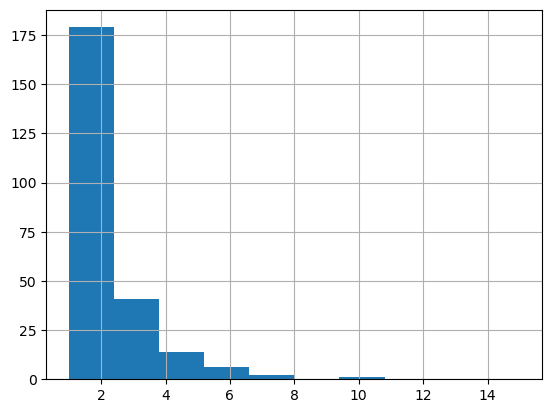

In [10]:
games_data['JP_sales'].hist(range =(1,15));

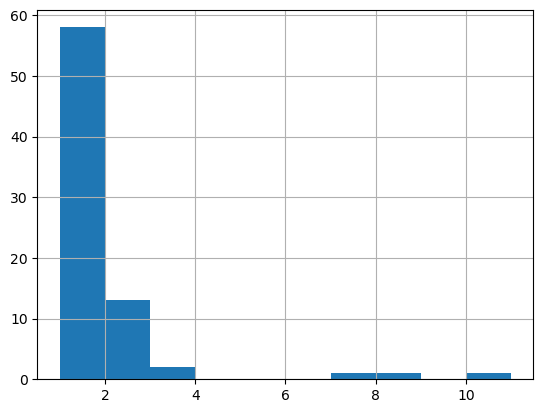

In [11]:
games_data['Other_sales'].hist(range =(1,11));

In [12]:
games_data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
games_data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
games_data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

# Шаг 2. Подготовьте данные 

In [15]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Приведем название столбцов в змеиный язык

In [17]:
games_data.columns = [x.lower() for x in games_data.columns]
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Необходимо избавится от неявных дубликатов в столбце платформы

In [18]:
print(games_data['platform'].unique())
games_data['platform'].value_counts()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [19]:
games_data['platform'] = games_data['platform'].replace('2600', 'A2600', regex=True)
games_data['platform'] = games_data['platform'].str.lower()

Данные в платформе подкорректированы большинство платформ настоящие консоли. С другой стороны, странно что компьютерные игры выбраны в таком маленьком кол-ве, так как на пк больше всего игр.

In [20]:
games_data['name'].head(50)

0                                       Wii Sports
1                                Super Mario Bros.
2                                   Mario Kart Wii
3                                Wii Sports Resort
4                         Pokemon Red/Pokemon Blue
5                                           Tetris
6                            New Super Mario Bros.
7                                         Wii Play
8                        New Super Mario Bros. Wii
9                                        Duck Hunt
10                                      Nintendogs
11                                   Mario Kart DS
12                     Pokemon Gold/Pokemon Silver
13                                         Wii Fit
14                              Kinect Adventures!
15                                    Wii Fit Plus
16                              Grand Theft Auto V
17                   Grand Theft Auto: San Andreas
18                               Super Mario World
19    Brain Age: Train Your Bra

In [21]:
games_data[games_data['name'] == 'Minecraft']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
72,Minecraft,x360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
180,Minecraft,ps3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN
261,Minecraft,ps4,2014.0,Misc,1.48,2.02,0.14,0.68,NaN,NaN,NaN
543,Minecraft,xone,2014.0,Misc,1.61,0.90,0.00,0.25,NaN,NaN,NaN
868,Minecraft,psv,2014.0,Misc,0.18,0.64,0.90,0.24,NaN,NaN,NaN
2973,Minecraft,wiiu,2016.0,Misc,0.28,0.17,0.18,0.04,NaN,NaN,NaN


In [22]:
games_data[games_data['name'] == 'Stardew Valley']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
games_data[games_data['name'] == 'Kerbal Space Program']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [24]:
games_data[games_data['name'] == 'Papers Please']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [25]:
games_data[games_data['name'] == 'DayZ']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Отсутствия некоторых игр в дата сете, которые вышли на ПК, так же странно. Возможно это вызвано отсутствием в дата сете игр сегмента (жанра) "Indie" 

In [26]:
games_data[games_data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [27]:
games_data[games_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две неизвестные игры с неизвеснтным жанром 1993 года на платформе Sega Genesis.
Их можно смело удалить.

In [28]:
games_data = games_data.dropna(subset=['genre'])
games_data = games_data.reset_index(drop= True)

Посмотрим пропущенные значения 269 штук в столбце с датой выхода игры.

In [29]:
games_data[games_data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,a2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропушеных значений примерно 1.61 %. Для анализа по данному столбцу эти пропуски не критичны, при этом стоит отметить что данные есть в свободном доступе. Так как игры могут выходить на разных платформах в разные годах заменить их по имени не является рациональным решением.
Таким образом мы оставим пропущеные данные как есть.

Перейдем к более значительным пропускам в столбцах:
critic_score в кол-ве 8576 пропусков 
user_score в кол-ве 6699 пропусков 
rating в кол-ве 6764 пропусков 

In [30]:
games_data[games_data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
games_data[games_data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [32]:
games_data[games_data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим строки с пропущенными значениями по всем трем столбцам.

In [33]:
score_nan = games_data[games_data['critic_score'].isnull() & games_data['user_score'].isnull() & games_data['rating'].isnull()]
score_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


2010.0    447
2008.0    435
2011.0    410
2009.0    402
2007.0    374
1998.0    346
2006.0    326
1999.0    296
2012.0    287
1997.0    268
2015.0    267
1996.0    255
2005.0    232
2014.0    229
2013.0    222
Name: year_of_release, dtype: int64
ps       983
ds       860
ps2      678
psp      663
ps3      363
n64      319
wii      313
gba      300
3ds      288
psv      278
snes     239
x360     201
sat      173
pc       142
a2600    133
Name: platform, dtype: int64


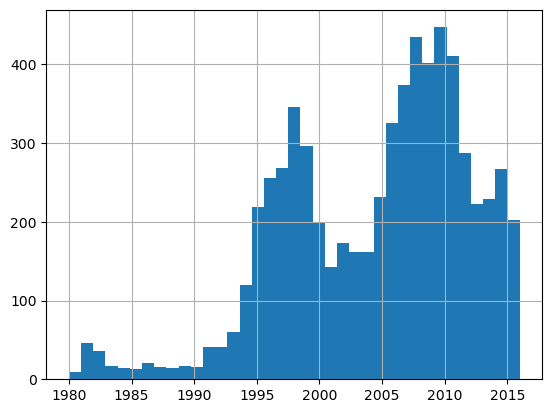

In [34]:
score_nan['year_of_release'].hist(bins = 37);
print(score_nan['year_of_release'].value_counts().head(15))
print(score_nan['platform'].value_counts().head(15))

Сразу в трех столбцах в 6619 строках отсутствуют значения. Отсутвие значений игр выпущеных до двухтысячных  можно обяснить тем что отсутвовали крупные сайты, журналы занимающимеся обзорами и оценками игр, а так же что первая рейтинговая система появилась в 1992 году(но еще не стала общеиспользуемой), и за это время постепенно развивалось до сегодняшнего дня. Но обяснить отсутствие значений с 2007 по 2014 уже сложнее. Еще можно сказать что некороые игры не выходили в представленых регионах, например есть игры которые продавались только в Японии.\
Таким образом заменять или удалять значения с этими пропусками не стоит.

Добавим столбец с продажами по всему миру

In [35]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Стоит отметить абриавеатуру 'tbd' - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода" так же оно может означать очень не популярные игры которые не были оценены даже после выхода. Данное значение можно перевести в nan.

In [36]:
games_data['user_score'] = games_data['user_score'].rename({'tbd':'nan'})
games_data['user_score'] = games_data['user_score'].str.replace('tbd', 'nan', regex= True)

In [37]:
games_data['user_score'].value_counts()

nan    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [38]:
games_data['all_sales'] = games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


------------------------------------------------------------

Так же преобразуем столбец с жанрами в змеиный язык

In [39]:
games_data['genre'] = games_data['genre'].str.lower()

Поменяем типы данных в столбце с оценками пользователей

In [40]:
games_data['user_score'] = games_data['user_score'].astype('float')

In [41]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  all_sales        16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Необходимо обработать дубликаты:
    - В столбце с платформами не могуть быть дуликаты т.к. они обозначают на какой консоли выпущена игра.
    - В столбце с годами не могуть быть дуликаты т.к. они обозначают в каком году выпущена игра.
    - В столбце с жанром не могуть быть дуликаты т.к. они обозначают в каком жанре выпущена игра.
    - В столбце с именем не могуть быть дуликаты т.к. они обозначают имя выпущенной игры.
    - Остальные столбцы количественные. 

Попробуем соединить имя игры и выпуск её на платформе и посмотреть есть ли здесь дубликаты

In [42]:
duplic= games_data['platform'] + games_data['name']

duplic.duplicated().sum()

duplic[duplic.duplicated()]

1590     x360Need for Speed: Most Wanted
4126               ps3Sonic the Hedgehog
11714      pcNeed for Speed: Most Wanted
16228                   ps3Madden NFL 13
dtype: object

In [43]:
games_data[games_data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
253,Need for Speed: Most Wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1189,Need for Speed: Most Wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1590,Need for Speed: Most Wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1997,Need for Speed: Most Wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2047,Need for Speed: Most Wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3580,Need for Speed: Most Wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5971,Need for Speed: Most Wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6272,Need for Speed: Most Wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6409,Need for Speed: Most Wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


В дата сете отсутствуют дубликаты. к примеру Need for Speed: Most Wanted 2012 года является перезапуском Need for Speed: Most Wanted 2005 года.

In [44]:
games_data[games_data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Обработаем пропуски в рейтинге - добавив заглушку 'not_assigned'

In [45]:
games_data['rating'].isnull().sum()

6764

In [46]:
games_data['rating'] = games_data['rating'].fillna('not_assigned') 

In [47]:
games_data['rating'].isnull().sum()

0

In [48]:
games_data['rating'].value_counts()

not_assigned    6764
E               3990
T               2961
M               1563
E10+            1420
EC                 8
K-A                3
RP                 3
AO                 1
Name: rating, dtype: int64

# Вывод 
Данные датасет проанализирован. Название столбцов, консолей и жанров приведены к змеиному языку. Пропуски проанализированы и отставлены без изменений так как их невозможно заполнить должным образом. Значение "tbd" приведено к пустому значению. Выявлены отсутствия игр жанра "инди". Данные приведены к необходимому типу данных. Сформирован отдельный столбец со всеми продажами.
____________________

# Шаг 3. Проведите исследовательский анализ данных

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
Name: year_of_release, dtype: int64


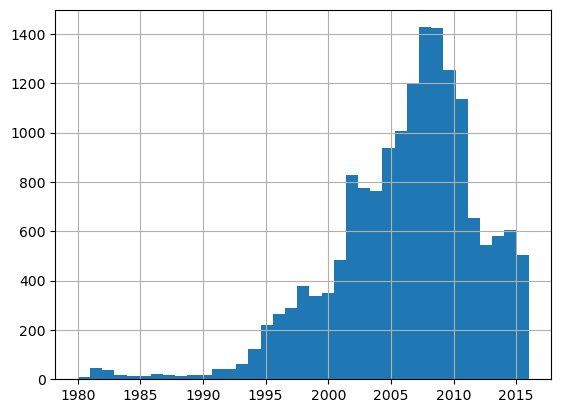

In [49]:
games_data['year_of_release'].hist(bins = 37,range = (1980,2016));
print(games_data['year_of_release'].value_counts().head(20))

Большинство игр в данном датасете выпущены в период с 2002 по 2011 года. Меньше всего игр было выпущено до 2000 года.
Стоит отметить, что все данные в этом столбце важны так как показывают как менялась игровая индустрия в том числе виден кризис 2009 года где идет заметный спад с 2010 по 2015 года.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, согласен с тобой.

Посмотрим, как менялись продажи по платформам. 

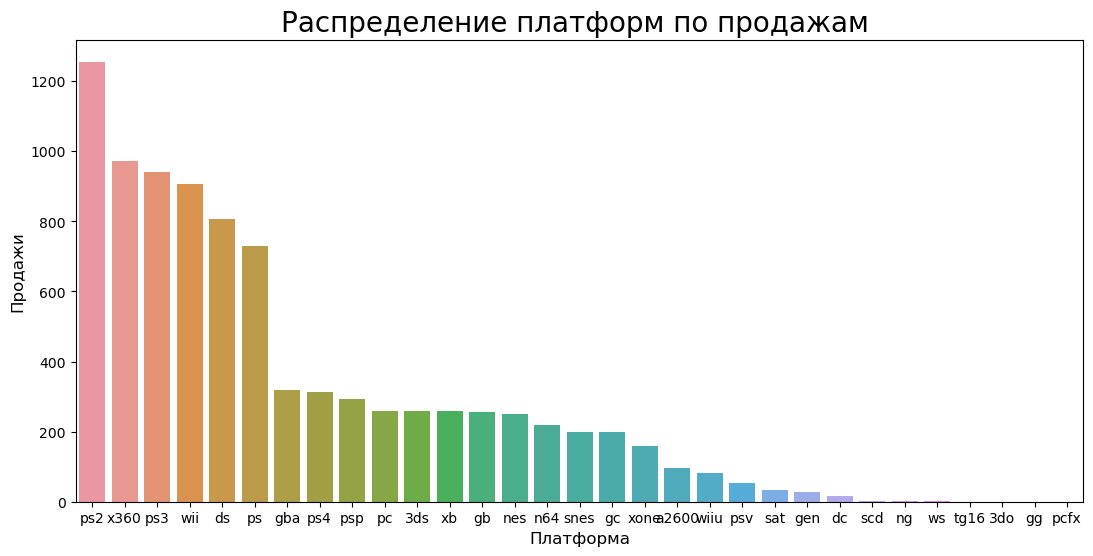

In [50]:
platform_sales = games_data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['all_sales']);
platform_sales.head(10)
plt.xlabel('Платформа',fontsize=12);
plt.ylabel('Продажи',fontsize=12);
plt.title('Распределение платформ по продажам ',fontsize=20);

наиболее популярные платформы в данном датасете: ps2, x360, ps3, wii, ds, ps, gba, ps4, psp, pc.

In [51]:
top_platforms = games_data.platform.value_counts().sort_values(ascending = False).head(5).index.values

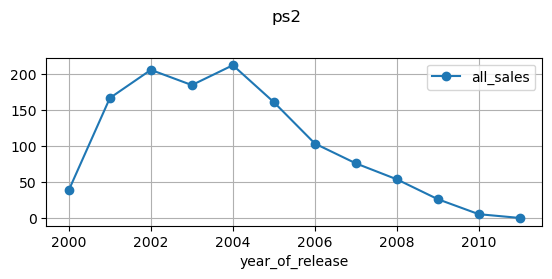

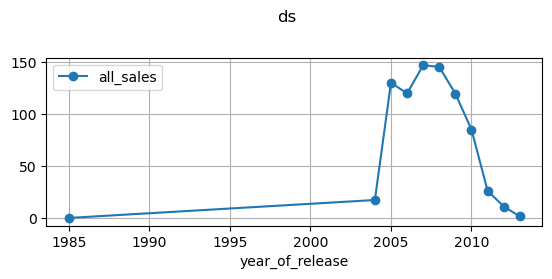

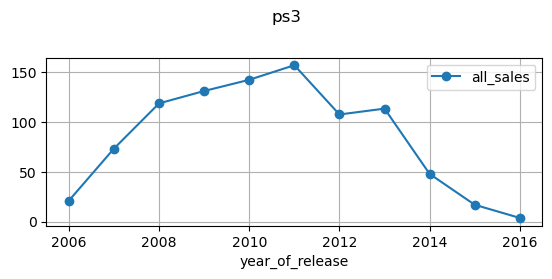

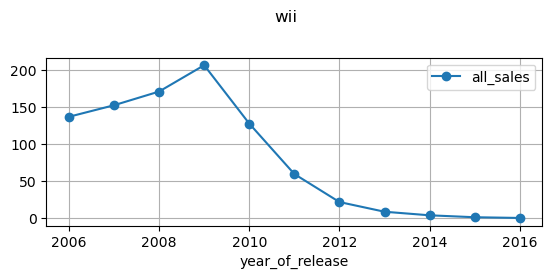

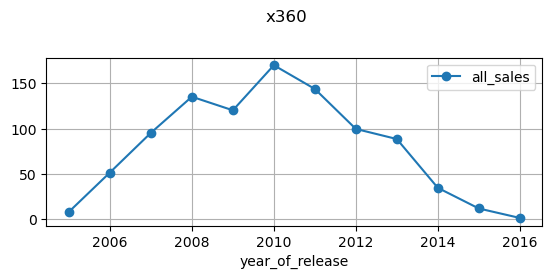

In [52]:
for platform in top_platforms:
    line = games_data[games_data['platform'] == platform].groupby('year_of_release')['all_sales'].sum()
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    line.plot(grid = True, marker='o',legend = True);
    fig.suptitle(platform)
    

Исходя из полученный данных можно сделать вывод что в среднем у консолей срок жизнеспособности - 10 лет.

Разработка большинства игр занимает порядка двух лет. Небольшие игры разрабатываются от полгода (и могут 10 лет находятся в раннем доступе). Большие же игры, сейчас могут разрабатываться порядка 6 лет (хоть это и редкость). Так что необходимо понять к какому сектору необходимо применить анализ т.к. инди игр тут мало стоит взять 6 лет, но за это время устаревает множество вещей в т.ч. консоли которые устаревают за 10 лет.
если взять 1 год - слишком мало за год может попросту ничего не выйти. 20 лет слишком много устаревших консолей и игр.
Стоит взять период 3, 5 или 7 лет.
Возмем - 5 лет. Опять таки необходимо понять к какому сектору игровой индустрии необходимо применить анализ для большой, средней или инди игры у всез них разные сроки жизни и разработки.

In [53]:
actual_data = games_data[games_data['year_of_release']>2011]

ps3     493
psv     411
3ds     396
ps4     392
x360    292
pc      250
xone    247
psp     173
wiiu    147
wii      54
ds       31
Name: platform, dtype: int64


array(['ps3', 'psv', '3ds', 'ps4', 'x360'], dtype=object)

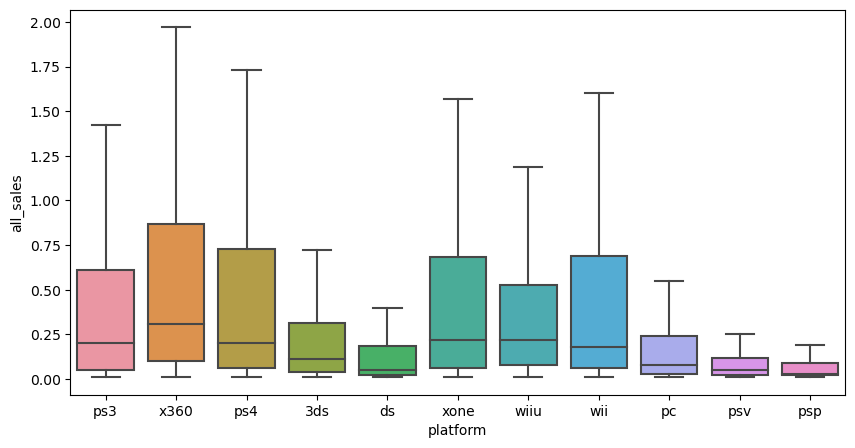

In [106]:
plt.figure(figsize=(10,5))
sns.boxplot(y='all_sales', x='platform',showfliers=False, data=actual_data);
print(actual_data.platform.value_counts().sort_values(ascending = False))
top_platforms_actual_data = actual_data.platform.value_counts().sort_values(ascending = False).head(5).index.values
top_platforms_actual_data

Больше всего медианное  значение продаж у X360, затем идет PS3 и PS4, после идут 3ds и psv.  Исходя из графиков видно, что медиана у всех различается.

кореляция отзывы пользователей по платформе ps3 с совокупными продажами: -0.005


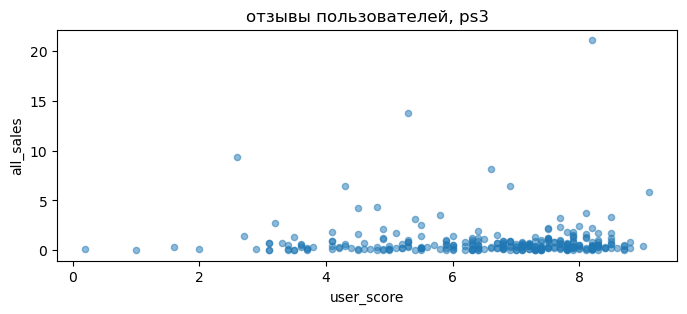

кореляция отзывы критиков по платформе ps3 с совокупными продажами: 0.331


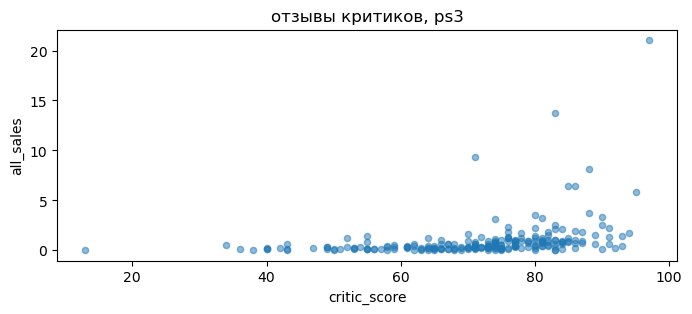

________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе psv с совокупными продажами: -0.004


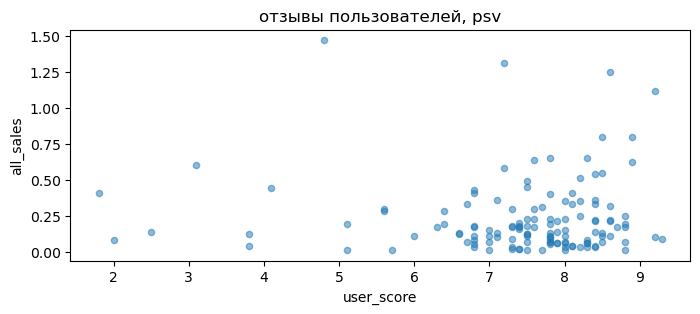

кореляция отзывы критиков по платформе psv с совокупными продажами: 0.094


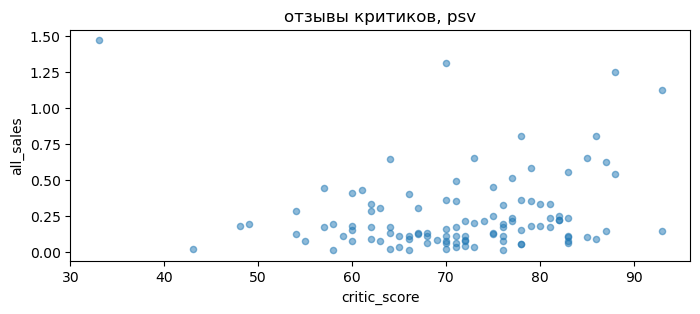

________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе 3ds с совокупными продажами: 0.198


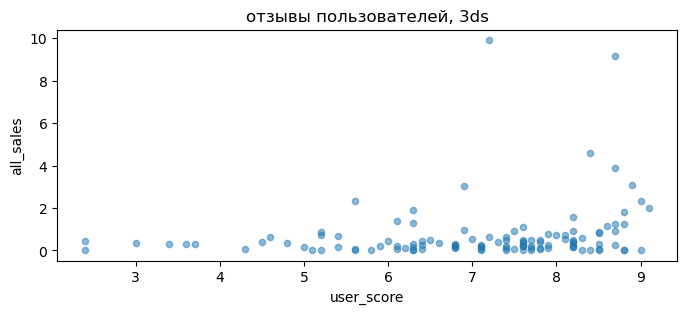

кореляция отзывы критиков по платформе 3ds с совокупными продажами: 0.321


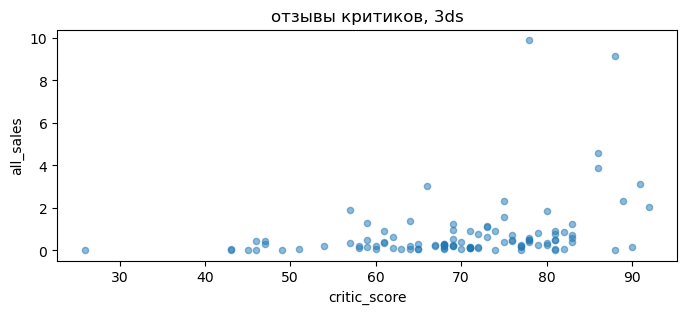

________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе ps4 с совокупными продажами: -0.032


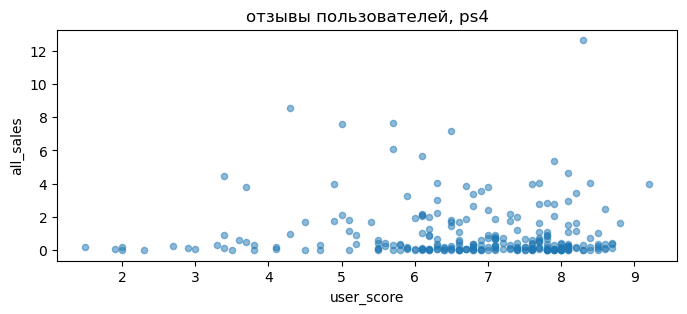

кореляция отзывы критиков по платформе ps4 с совокупными продажами: 0.407


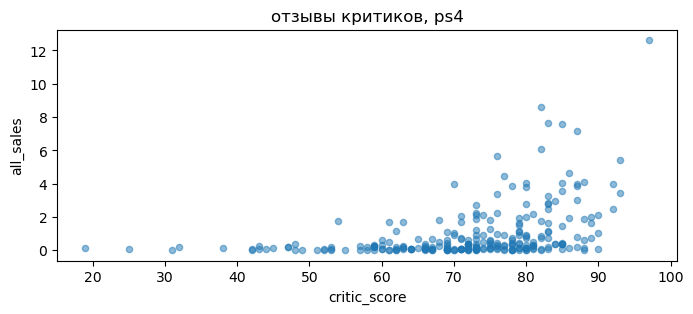

________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе x360 с совокупными продажами: 0.006


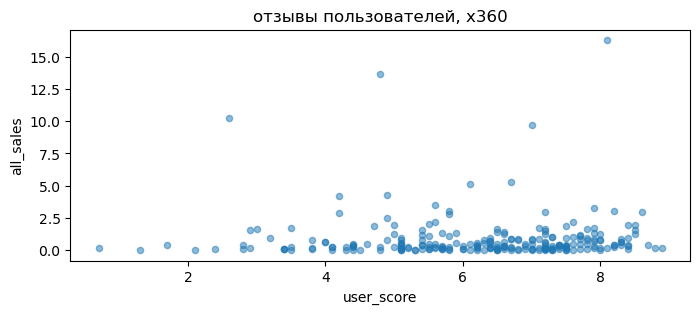

кореляция отзывы критиков по платформе x360 с совокупными продажами: 0.361


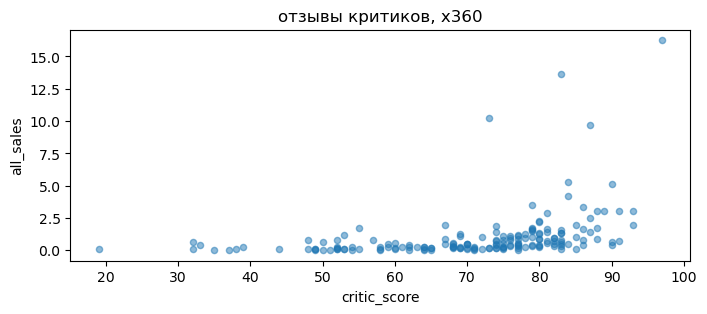

________________________________________________________________________________________________________________


In [55]:
for platform in top_platforms_actual_data:
    
    score = actual_data[actual_data['platform'] == platform]
    
    score.plot(y='all_sales', x='user_score', kind='scatter', alpha=0.5, figsize=( 8 , 3 ), title=f'отзывы пользователей, {platform}');
    print('кореляция отзывы пользователей по платформе', platform,'с совокупными продажами:', \
          round(score['all_sales'].corr(score['user_score']),3))
    plt.show()
    score.plot(y='all_sales', x='critic_score', kind='scatter', alpha=0.5,figsize=( 8 , 3 ), title=f'отзывы критиков, {platform}');
    print('кореляция отзывы критиков по платформе', platform,'с совокупными продажами:', \
          round(score['all_sales'].corr(score['critic_score']),3))
    plt.show()
    print('________________________________________________________________________________________________________________')
   

Согласно полученным значениям корреляции, можно сказать, что оценки критиков намного сильнее влияет на продажи чем оценки пользователей. У ps3, наибольшая зависимость между оценками критиков и продажами.
Полученные данные можно обяснить тем что критики получают игру наиболее ранее - пользователей (две или одну недели) и зачастую приукрашивают общее впечатление, не только из -за корысти но из за нехватки времени оценить продукт.

cоотнесем выводы с продажами игр на других платформах.

In [56]:
all_platforms = actual_data.platform.value_counts().sort_values(ascending = False).tail(6).index.values
all_platforms

array(['pc', 'xone', 'psp', 'wiiu', 'wii', 'ds'], dtype=object)

In [107]:
for platform in all_platforms:
    score = actual_data[actual_data['platform'] == platform]
    print('кореляция отзывы пользователей по платформе', platform,'с совокупными продажами:', \
          round(score['all_sales'].corr(score['user_score']),3))
    print('кореляция отзывы критиков по платформе', platform,'с совокупными продажами:', \
          round(score['all_sales'].corr(score['critic_score']),3))
    plt.show()
    print('________________________________________________________________________________________________________________')

кореляция отзывы пользователей по платформе pc с совокупными продажами: -0.122
кореляция отзывы критиков по платформе pc с совокупными продажами: 0.237
________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе xone с совокупными продажами: -0.069
кореляция отзывы критиков по платформе xone с совокупными продажами: 0.417
________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе psp с совокупными продажами: -0.802
кореляция отзывы критиков по платформе psp с совокупными продажами: nan
________________________________________________________________________________________________________________
кореляция отзывы пользователей по платформе wiiu с совокупными продажами: 0.4
кореляция отзывы критиков по платформе wiiu с совокупными продажами: 0.348
________________________________________________

C:\Users\mizu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\mizu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Тенденция, разницы между отзывами критиков и пользователей сохраняются.  Можно отметить консоль wiiu где отзывы пользователей чуть больше влияют на продажи.  

Построим граффик распределения игр по жанрам

In [85]:
distr_genre = actual_data.pivot_table(index='genre', values='all_sales', aggfunc='mean').sort_values(by='all_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,all_sales
0,shooter,1.296723
1,platform,0.717647
2,sports,0.675634
3,role-playing,0.521081
4,racing,0.465217
5,misc,0.442917
6,simulation,0.439000
7,action,0.427856
8,fighting,0.408165
9,strategy,0.187887


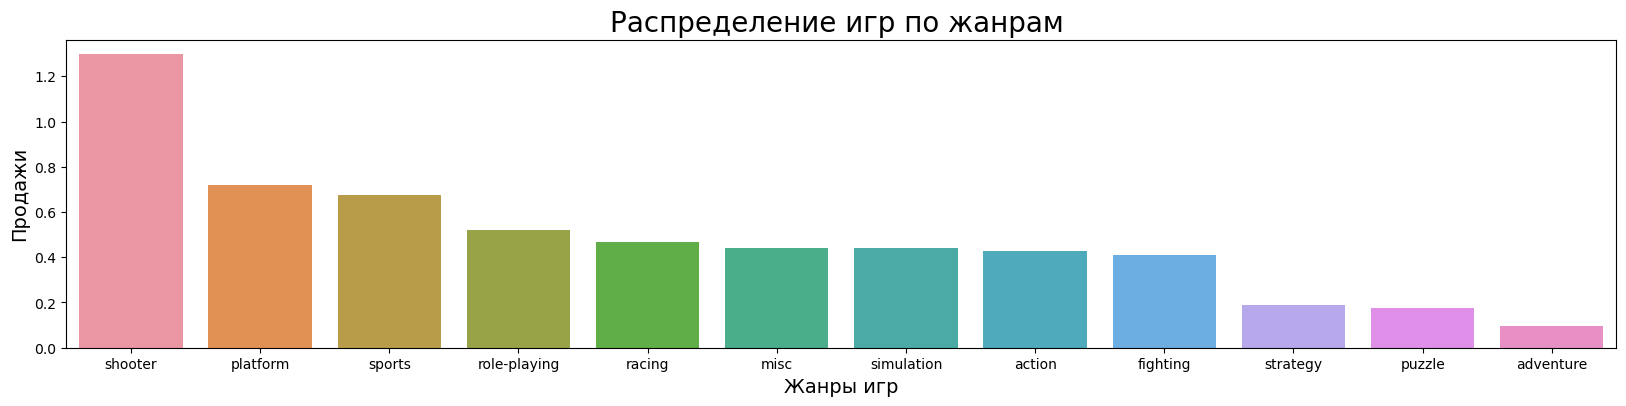

In [109]:
plt.figure(figsize=(20,4))
plt.title('Распределение игр по жанрам ',fontsize=20)
sns.barplot(data=distr_genre, x='genre', y='all_sales')
plt.xlabel('Жанры игр',fontsize=14);
plt.ylabel('Продажи',fontsize=14);

В среднем за 5 лет самым популярным жанром стали шутеры, платформеры за счет Японских игр спорт и ролевые игры. а наименее популярны файтинги, пазлы, адвенчуры (на самом деле нет) и стратегии. Опять таки стоит отметить что игры совмещают разные жанры к примеру GTA 5 отнесена к action при этом имеет жанр action-adventure сразу возникает вопрос как жанр adventure оказалась на последнем месте. Жанры как и другие оценочные суждения изменяются и эволюционируют так адвенчуры 80-x, 2000, и 2015 отличаются между собой.

# Вывод

При проведении иследовательского анализа данных выявлено следующее:
- Больше всего игр выпущены в период с 2002 по 2011 года;
- В среднем у консолей срок жизнеспособности - 10 лет;
- Наиболее популярными платформи являются: ps2, x360, ps3, wii, ds;
- Наиболее популярны жанры экшен, спорт и шутеры. наименее популярны пазлы, адвенчуры и стратегии;
- Существует средняя корелляция между оценкакми критиков и продажами игр, Существует слабая корелляция между оценкакми критиков и продажами игр. То есть оценки критиков сильнее влияют на продажи чем оценки пользователей;

# Шаг 4. Составьте портрет пользователя каждого региона

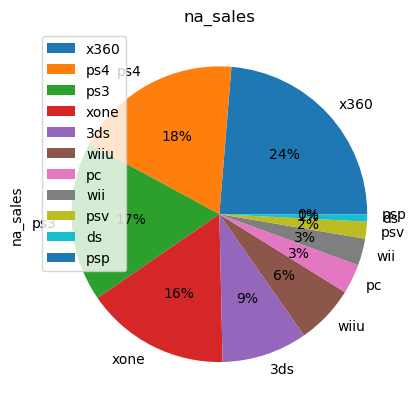

In [60]:
actual_data.groupby(['platform']).sum().sort_values(by='na_sales', ascending=False).plot(kind='pie', y='na_sales', autopct='%1.0f%%',title='na_sales'); 

Круговые графики тут не подойдут слишком много значений.

In [110]:
def pivot(row):
    print(actual_data.pivot_table(index='platform', values=row, aggfunc='sum').sort_values(by=row, ascending=False).head(5))
    actual_data.pivot_table(index='platform', values=row, aggfunc='sum').sort_values(by=row, ascending=False).plot(kind = 'bar')
    plt.show()
    print(actual_data.pivot_table(index='genre', values=row, aggfunc='sum').sort_values(by=row, ascending=False).head(5))
    actual_data.pivot_table(index='genre', values=row, aggfunc='sum').sort_values(by=row, ascending=False).plot(kind = 'bar')
    plt.show()
    print(actual_data.pivot_table(index='rating', values=row, aggfunc='sum').sort_values(by=row, ascending=False))
    actual_data.pivot_table(index='rating', values=row, aggfunc='sum').sort_values(by=row, ascending=False).plot(kind = 'bar')
    plt.show()
    

          na_sales
platform          
x360        140.05
ps4         108.74
ps3         103.38
xone         93.12
3ds          55.31


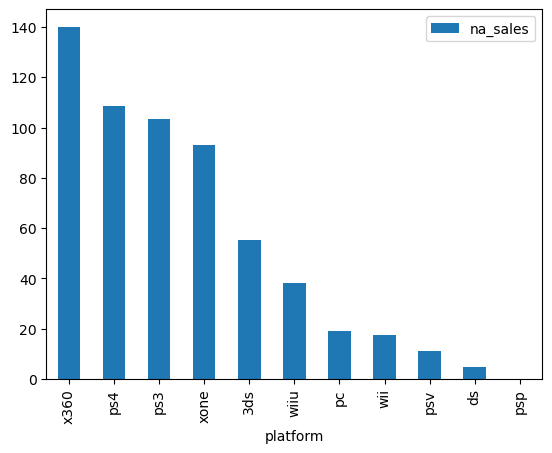

              na_sales
genre                 
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19


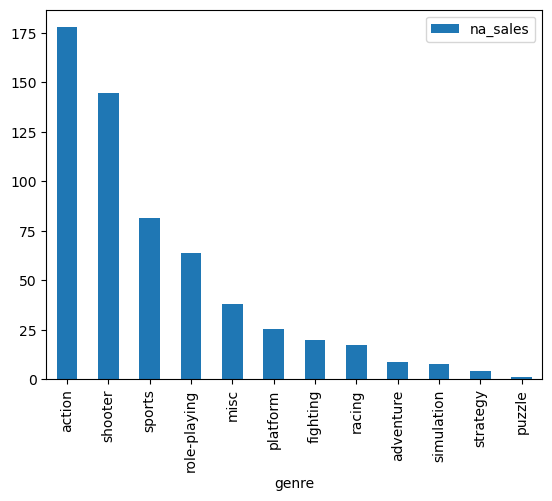

              na_sales
rating                
M               231.57
E               114.37
not_assigned    103.31
E10+             75.70
T                66.02


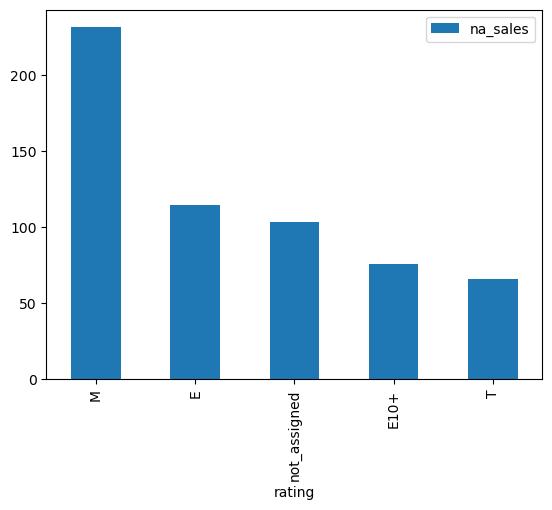

In [62]:
pivot('na_sales')

На рынке Северной-Америке самые продаваемые игры на xbox 306 и playstation 4 с жанром экшн и шутер с возрастным рейтингом 17 +.\
Наименее популярные игры на платформе psp, ds, и psv с жанром пазлы стратегии и симуляторы с рейтингом 13 +.

          eu_sales
platform          
ps4         141.09
ps3         106.86
x360         74.52
xone         51.59
3ds          42.64


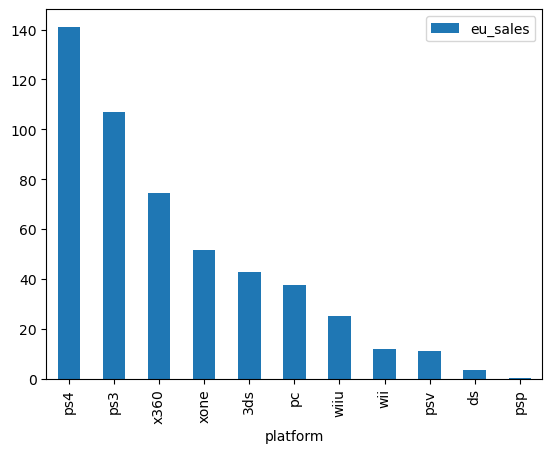

              eu_sales
genre                 
action          159.34
shooter         113.47
sports           69.09
role-playing     48.53
racing           27.29


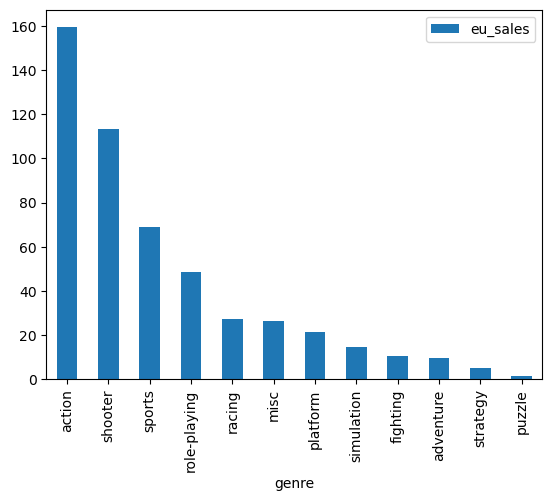

              eu_sales
rating                
M               193.96
E               113.03
not_assigned     91.50
E10+             55.37
T                52.96


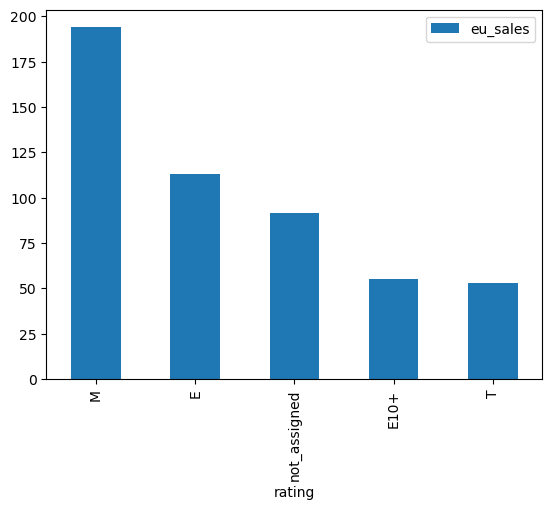

In [63]:
pivot('eu_sales')

На Европейском рынке самые продаваемые игры на playstation 4 и playstation 3 с жанром экшн и шутер с возрастным рейтингом 17 + при этом продажи игр на playstation 4 .\
Самые не популярные игры так же на старых портативных консолях psv,ds,psp с жанром пазл, стратегии и файтинги с возрастным рейтингом 13+.


          jp_sales
platform          
3ds          87.79
ps3          35.29
psv          21.04
ps4          15.96
wiiu         13.01


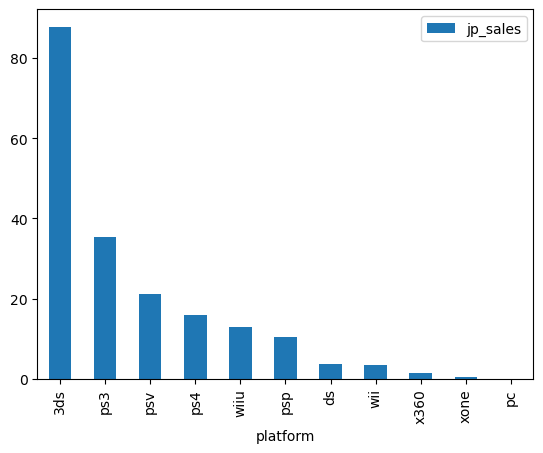

              jp_sales
genre                 
role-playing     65.44
action           52.80
misc             12.86
simulation       10.41
fighting          9.44


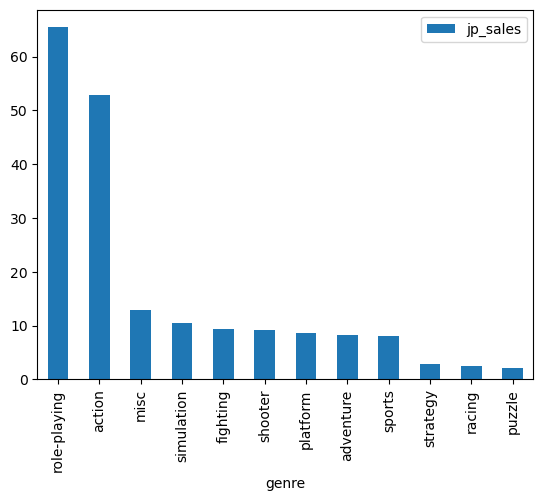

              jp_sales
rating                
not_assigned    108.84
E                28.33
T                26.02
M                21.20
E10+              8.19


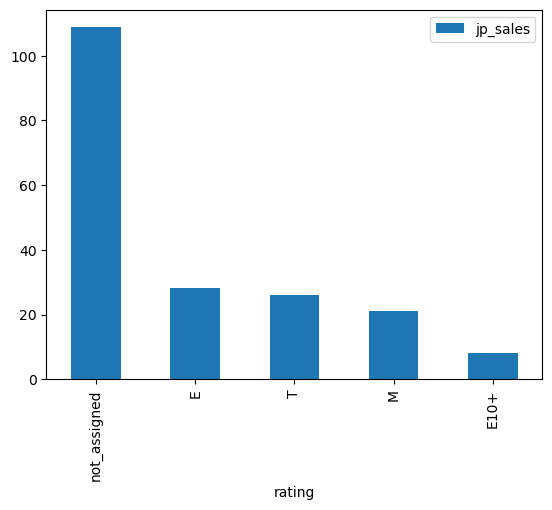

In [64]:
pivot('jp_sales')

на Японском рынке другая ситуация больше всего продаж на платформе 3ds с жанром экшен и рпг. На Японском рынке больше всего пропушенных значений(можно предположить по аналогии сдругими рынками что отсутствуюшие значения в 70 % с рейтингом 17+) в рейтинге на втором месте игры с рейтингом 13+\
Самые не популярные игры так же на ПК и Xbox360, XboxOne c стратегии, гонки, спорт и пазлы.

# вывод 
Для Европейского и Северо-Амереканского рынков за последние 5 лет характерно - популярные игры с жанрами шутер, адвенчура и спорт на xbox и на Sony PlayStation c возрастным рейтингом 17+, 13+ и 10+. Стоит отметить низкий спрос на портативные консоли. В связи с этим для этих рынков не стоит выпускать игры на портативных консолях \

Для Японского характерны консоли 3ds и ps4,ps3 в жанре экшн и рпг с возрастным рейтингом 13+. Так же стоит отметить что для Японского рынка характерны портативные консоли. Но из-за низкого спроса не стоит выпускать игры для на Японии на платформе от Microsoft.\

Для всех рынков характерно не популярность интелектуалных игр а именно стратегий(видимо как rts так и пошаговых) и пазлов так как порог входа в эти игры достаточно высок в отличие от шутеров или экшенов.

Отличием является что на европейском рынке не долюбливают - симуляторы, а на рынке Северной Америке не долюбливают - файтинги,
отличием же Японсого рынка является низкий спрос на жанр гонки и спорт.

# Шаг 5. Проверьте гипотезы

Сделаем срез данных за 5 лет по Xbox One и PC и посчитаем среднее значение пользовательских оценок этих платформ.

In [65]:
user_score_pc = games_data[(games_data['year_of_release']>2011) & (games_data['platform'] == 'pc')]['user_score']
user_score_xone = games_data[(games_data['year_of_release']>2011) & (games_data['platform'] == 'xone')]['user_score']
print(user_score_pc.mean())
print(user_score_xone.mean())

6.428640776699027
6.52142857142857


Применим метод t-тест, так как генеральные совокупности не зависят друг от друга и взяты за один период. 

Выведим нулевую и альтернативную гипотезу:
- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [66]:
alpha = 0.05
results = st.ttest_ind(user_score_xone.dropna(), user_score_pc.dropna(),equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Согласно полученным значением p-value можно сказать, что различия между оценками Xbox One и PC не существенно отличатся друг от друга. Таким образом, не получилось опровергнуть Нулевую гипотезу.

Применим метод t-тест, так как генеральные совокупности не зависят друг от друга и взяты за один период. 

Сделаем срез данных за 5 лет по жанрам Action и Sports и посчитаем среднее значение пользовательских оценок этих жанров.

In [67]:
user_score_action = games_data[(games_data['year_of_release']>2011) & (games_data['genre'] == 'action')]['user_score']
user_score_sports = games_data[(games_data['year_of_release']>2011) & (games_data['genre'] == 'sports')]['user_score']
print(user_score_action.mean())
print(user_score_sports.mean())

6.825047801147237
5.455897435897437


Выведим нулевую и альтернативную гипотезу:
- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [68]:
alpha = 0.05
results = st.ttest_ind(user_score_action.dropna(), user_score_sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Получив значение p-value можно сказать что различия между оценками жанров Action и Sports значительно отличаются друг от друга
Таким образом, мы отвергли Нулевую гипотезу, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

### Вывод
Мы проверили гипотезы:
- Гипотеза что средние пользовательские рейтинги платформ Xbox one и PC одинаковые. Нулевую гипотезу не удалось опровергнуть. Так как различия между ними не существенные.
- Гипотеза что средние пользовательские рейтинги жанров Action и Sports разные. Отвергаем нулевую гипотезу. Так как различия между ними значительные.

# Шаг 6. Вывод

Данный дата сет проанализирован и приведены в порядок.\
В данном дата сете отсутствуют игры с жанром "Indie game" вполне возможно это связано с "ранним доступом" таких игр. \
Выявлено что основной пик выпуска игр произошёл с 2002 по 2011 года. Падение с 2010 года связано с мировым финансовым кризисом и нестабильностью на рынке (в том числе ростом популярности инди игр по типу майнкрафта)\
Также жанры в дата сете указаны некорректно, так как жанры обычно пересекаются, уже почти нет 'чистых' жанров зачастую они смешенные как экшн-шутеры или экшн-рпг, экшн-адвенчуры (или игр со смесью почти всех жанров)
-------

В среднем консоль существует на рынке не более 10 лет.\
Существует зависимость между рейтингом критиков и продажами. Чем выше рейтинг критиков, тем выше продажи. Следовательно, имеет смысл продвигать игры через критиков(к примеру, можно отослать копию игры)

-------

Рейтинги между платформами могут быть близки друг к другу (на примере Xbox one и PC). Зачастую рейтинги у одной игры на одной консоли сопоставимы с  этой игрой но на доругой платформе(существенная разница может быть в случае плохой оптимизации или плохого переноса с одной консоли на другую (к примеру с консоли на ПК)).\
Средние пользовательские рейтинги жанров могут различаться (на примере Action и Sports).Что в принципе логично т.к. разные жанры расчитаны на разную аудиторию. \
Наиболее популярными платформами за весь период являются: playstation 2, Xbox360, playstation 3, wii, ds. \
Наиболее популярными платформами за актуальный период являются 3ds, PC, Xbox360, XboxOne, playstation 3 и 4.

-------
В итоге, если начать разрабатывать игру для получения наибольшей прибыли, стоит разработать мобильную игру т.к. она менее затратная в разработке, как по ресурсам так и по деньгам.

-------

Для Европейского и Северо-Американского рынков стоить разрабатывать игру на PC и консолях нынешнего поколения
Если все-таки разрабатывать консольную игру, то стоит начать разрабатывать игру на PC и консолях нынешнего поколения (по состоянию на следующий год - 2017 г.) playstation 4 и XboxOne. Стоит выбрать жанр экшн-адвенчуру, экшн-шутер, спорт и экшн-рпг с возрастным ограничением 13+ или 17+.

Для японского рынка, стоит выбрать консоли 3ds(портативная консоль) и ps4 в жанре экшн-рпг и jrpg с возрастным рейтингом 13+ и 17+.
В любом случае, зачастую разработчики, стараются охватить множесто актуальных платформ, выпуская игру кросс-платформенной.

-------
Для всех рынков менее популярными жанрами являются стратегии и пазлы. Старые консоли так же непопулярные т.к. их жизненый цикл давно закончился и они выпускались, когда геймеров было намного меньше. Так же не стоит выбирать рейтинги с низкими возрастными ограничениями (0+,6+,10+) т.к. они расчитаны на детей и охватывают меньше рынка. Для Японского рынка не стоит выбирать консоли от Microsoft.


Также стоит провести обширную рекламную компанию(в том числе для повышения оценок от критиков), при этом стоит быть осторожными с фанатами, и старатся их не обманывать.


-------
Можно обработать и проанализировать другие признаки:
- Сравнить средний рейтинг игр по годам и консолям. 
- Существует ли оказуаливание игр за счет изменения оценок.
- Интересно было бы найти и сравнить данные по мобильному рынок игр с полноценными играми на консольях и компьютерах, так как в последнее время моб. игры стали приносить больше прибыли чем компьютерные, за счет большей распространённости смарфонов.
- Соотнести популярность жанров в зависимости от платформы. По понятным причинам жанр стратегии будет намного популярнее на PC чем на консолях.
- Следует провести категаризацию классу бюджетности игр по типу triple-A (высокобюджетная игра), средней(вроде-бы тип А и Инди(то же могут быть популярными (500 тыс. проданных копий.(в т.ч. за счет Steam)) и прибыльными).
- Соотнести выручку с инфляцией.
-------